In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
 # Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# Assign the class to a variables
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Use inspect to find column names for exploratory precipitation analysis 
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
latest_date = session.query(measurement).order_by(measurement.id.desc()).first()
latest_date = latest_date.date

In [11]:
# Calculate the date one year from the last date in data set.
one_year_from_last = dt.date(2017, 8, 23) - dt.timedelta(days=365)

one_year_from_last_string = one_year_from_last.strftime('%Y-%m-%d')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

year_data = session.query(measurement).\
    filter(measurement.date >= one_year_from_last_string).\
    filter(measurement.date <= latest_date).all()


In [13]:
# Perform a query to retrieve the data and precipitation scores
for measurement in year_data:
    print(measurement.date, measurement.prcp)

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
20

In [14]:
results = []
for measurement in year_data:
    this_year_data = {}
    this_year_data["date"] = measurement.date
    this_year_data["precipitation"] = measurement.prcp
    results.append(this_year_data)

results

[{'date': '2016-08-23', 'precipitation': 0.0},
 {'date': '2016-08-24', 'precipitation': 0.08},
 {'date': '2016-08-25', 'precipitation': 0.08},
 {'date': '2016-08-26', 'precipitation': 0.0},
 {'date': '2016-08-27', 'precipitation': 0.0},
 {'date': '2016-08-28', 'precipitation': 0.01},
 {'date': '2016-08-29', 'precipitation': 0.0},
 {'date': '2016-08-30', 'precipitation': 0.0},
 {'date': '2016-08-31', 'precipitation': 0.13},
 {'date': '2016-09-01', 'precipitation': 0.0},
 {'date': '2016-09-02', 'precipitation': 0.0},
 {'date': '2016-09-03', 'precipitation': 0.0},
 {'date': '2016-09-04', 'precipitation': 0.03},
 {'date': '2016-09-05', 'precipitation': None},
 {'date': '2016-09-06', 'precipitation': None},
 {'date': '2016-09-07', 'precipitation': 0.05},
 {'date': '2016-09-08', 'precipitation': 0.0},
 {'date': '2016-09-09', 'precipitation': 0.03},
 {'date': '2016-09-10', 'precipitation': 0.0},
 {'date': '2016-09-11', 'precipitation': 0.05},
 {'date': '2016-09-12', 'precipitation': 0.0},
 {'

In [15]:
prcp_df = pd.DataFrame(results)
prcp_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [16]:
# Sort the dataframe by date
#prcp_df_sorted = prcp_df.sort_values()

prcp_df['date'] = pd.to_datetime(prcp_df['date'])
prcp_df.sort_values(by='date',ascending=False)


,date,precipitation
2229,2017-08-23,0.45
1528,2017-08-23,0.08
1008,2017-08-23,0.00
360,2017-08-23,0.00
1527,2017-08-22,0.00
...,...,...
361,2016-08-23,0.15
1881,2016-08-23,0.70
1192,2016-08-23,0.02
1009,2016-08-23,NaN


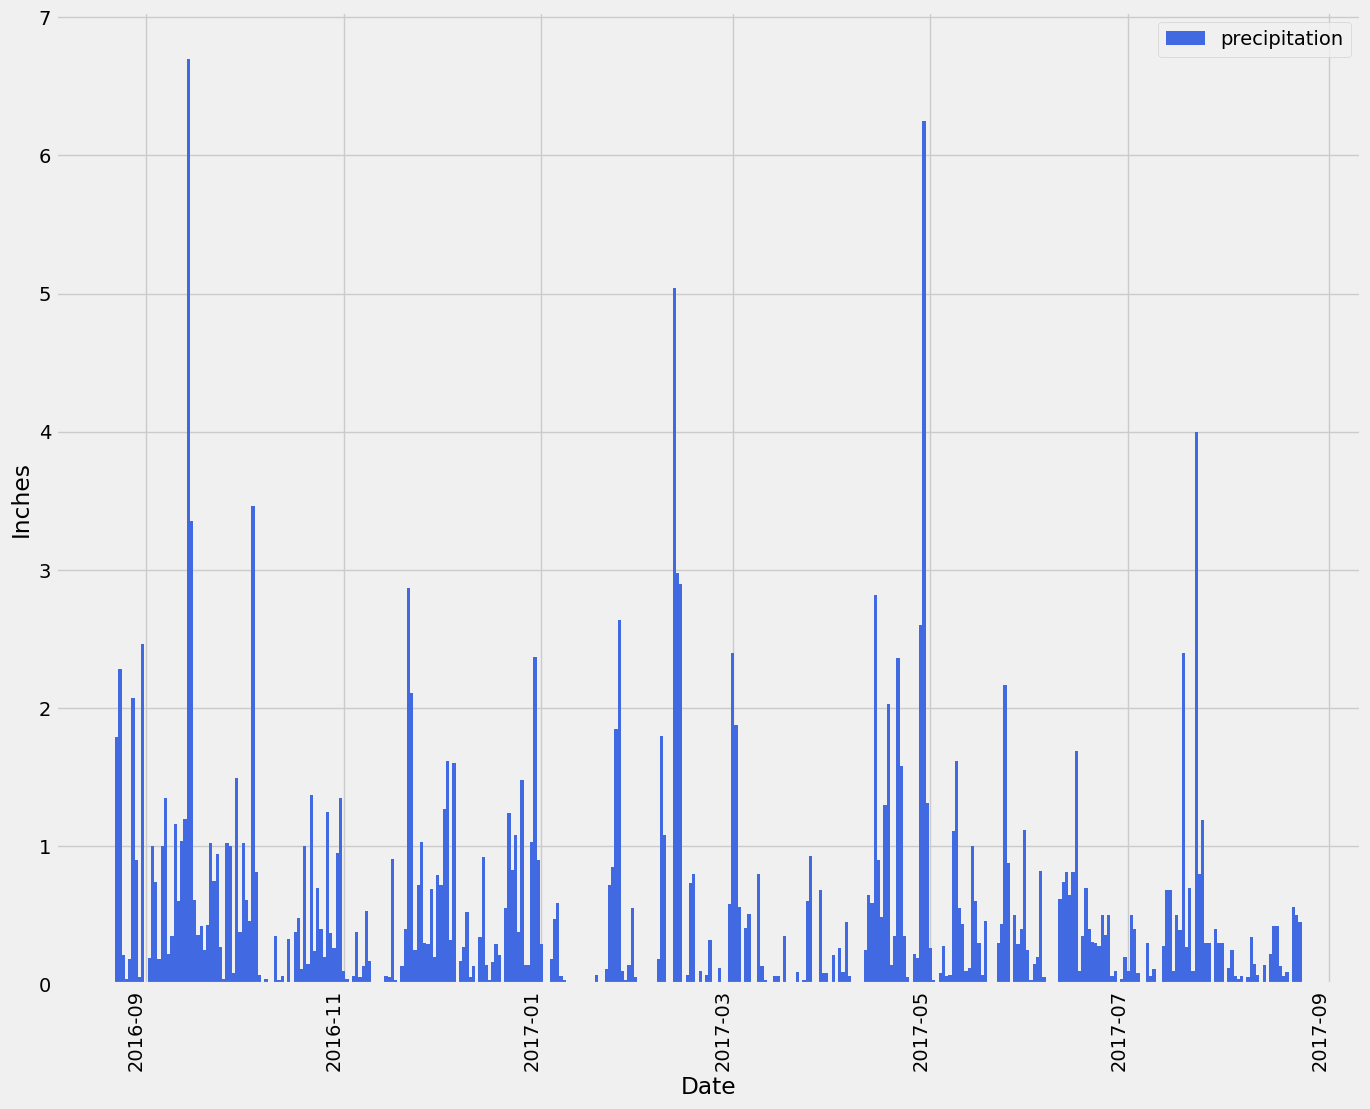

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
date = prcp_df['date']
precipitation = prcp_df['precipitation']

plt.figure(figsize=(15,12))

plt.bar(date, precipitation, color ='royalblue',width = 1)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90, ha='right')
plt.legend(['precipitation'])

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_df = pd.DataFrame(prcp_df['precipitation'].describe())
summary_df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset


In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [23]:
# Close Session
session.close()